In [165]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

In [184]:
reference_ds = xr.open_dataset('load_data/reference_ds.grib2', engine='cfgrib')

reference_ds = reference_ds.sortby('latitude', ascending=False)

reference_ds = reference_ds.sel(latitude=slice(50, 46.25), longitude=slice(236, 239.75))
# reference_ds = reference_ds.sel(latitude=slice(41, 37.25), longitude=slice(251, 254.75))

data = np.array(reference_ds['orog'])

data.shape

Ignoring index file 'load_data/reference_ds.grib2.9093e.idx' incompatible with GRIB file


(16, 16)

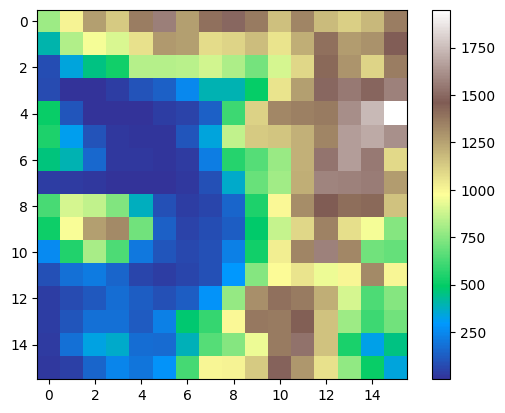

In [185]:
plt.imshow(data, cmap='terrain')
plt.colorbar()  # Optional: add a colorbar
plt.show()

In [186]:
reference_ds = xr.open_dataset('load_data/reference_ds.grib2', engine='cfgrib')
reference_ds = reference_ds.sel(latitude=slice(50, 46.25), longitude=slice(236, 239.75))
data = np.array(reference_ds['orog'])

def nearest_neighbor_interp(A, new_size):
    Row, Col = new_size

    rtR = Row / A.shape[0]
    rtC = Col / A.shape[1]

    IR = np.ceil(np.arange(1, A.shape[0] * rtR + 1) / rtR).astype(int) - 1
    IC = np.ceil(np.arange(1, A.shape[1] * rtC + 1) / rtC).astype(int) - 1

    IR[IR >= A.shape[0]] = A.shape[0] - 1
    IC[IC >= A.shape[1]] = A.shape[1] - 1

    B = A[IR, :]
    B = B[:, IC]

    return B

fine_data = nearest_neighbor_interp(data, (data.shape[0] * 4, data.shape[1] * 4))

Ignoring index file 'load_data/reference_ds.grib2.9093e.idx' incompatible with GRIB file


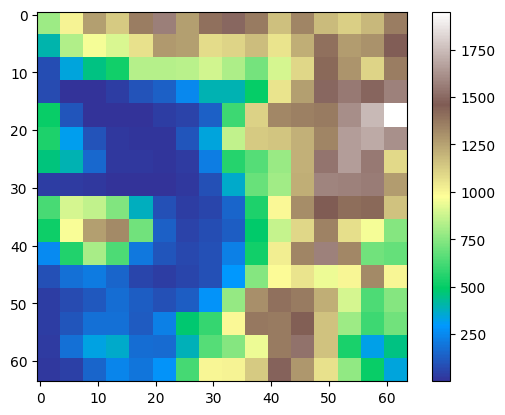

In [187]:
fine_data = nearest_neighbor_interp(data, (data.shape[0] * 4, data.shape[1] * 4))

#plot the data using terrain colormap
plt.imshow(fine_data, cmap='terrain')
plt.colorbar()  # Optional: add a colorbar
plt.show()

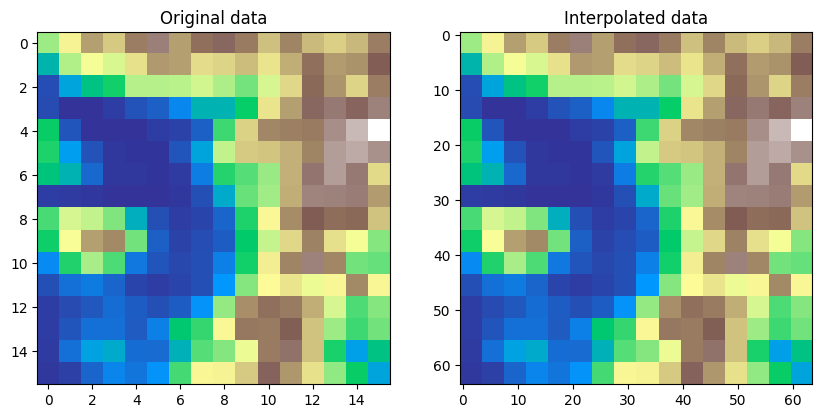

727.97253 727.97253


In [188]:
#subplots with data and fine_data using terrain colormap
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data, cmap='terrain')
axs[0].set_title('Original data')
axs[1].imshow(fine_data, cmap='terrain')
axs[1].set_title('Interpolated data')
plt.show()

print(np.mean(data), np.mean(fine_data))

Ignoring index file 'load_data/reference_ds.grib2.9093e.idx' incompatible with GRIB file


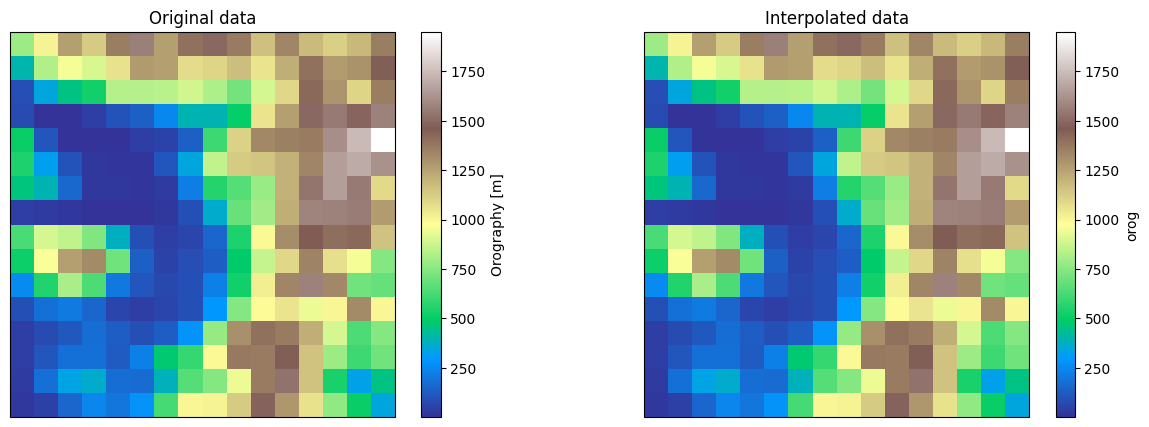

727.97253 727.97253
(16, 16) (64, 64)


In [192]:
import numpy as np
import xarray as xr

# Load and slice the reference dataset
reference_ds = xr.open_dataset('load_data/reference_ds.grib2', engine='cfgrib')
reference_ds = reference_ds.sel(latitude=slice(50, 46.25), longitude=slice(236, 239.75))
data = np.array(reference_ds['orog'])

def nearest_neighbor_interp(A, new_size):
    """
    Perform nearest neighbor interpolation on a 2D array.

    Parameters:
    - A: 2D numpy array, the original data array.
    - new_size: tuple, the target size (new_rows, new_cols).

    Returns:
    - B: 2D numpy array, the interpolated data array.
    """
    Row, Col = new_size
    rtR = Row / A.shape[0]
    rtC = Col / A.shape[1]

    IR = np.ceil(np.arange(1, A.shape[0] * rtR + 1) / rtR).astype(int) - 1
    IC = np.ceil(np.arange(1, A.shape[1] * rtC + 1) / rtC).astype(int) - 1

    IR[IR >= A.shape[0]] = A.shape[0] - 1
    IC[IC >= A.shape[1]] = A.shape[1] - 1

    B = A[IR, :]
    B = B[:, IC]

    return B

# Perform nearest neighbor interpolation
fine_data = nearest_neighbor_interp(data, (data.shape[0] * 4, data.shape[1] * 4))

# Calculate new latitude and longitude coordinates
latitudes = np.linspace(reference_ds.latitude.values.max(), reference_ds.latitude.values.min(), fine_data.shape[0])
longitudes = np.linspace(reference_ds.longitude.values.min(), reference_ds.longitude.values.max(), fine_data.shape[1])

# Create a new xarray DataArray
fine_data_array = xr.DataArray(
    fine_data,
    coords=[latitudes, longitudes],
    dims=['latitude', 'longitude'],
    name='orog'
)

# Create a new xarray Dataset
fine_ds = xr.Dataset({'orog': fine_data_array})

# Display the new dataset
fine_ds

#plot reference_ds and fine_ds next to each other using cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
reference_ds['orog'].plot(ax=axs[0], cmap='terrain')
axs[0].set_title('Original data')
fine_ds['orog'].plot(ax=axs[1], cmap='terrain')
axs[1].set_title('Interpolated data')
plt.show()

#print the mean of both
print(reference_ds['orog'].mean().values, fine_ds['orog'].mean().values)
# print the number of lats and lons
print(reference_ds['orog'].shape, fine_ds['orog'].shape)

Ignoring index file 'load_data/reference_ds.grib2.9093e.idx' incompatible with GRIB file


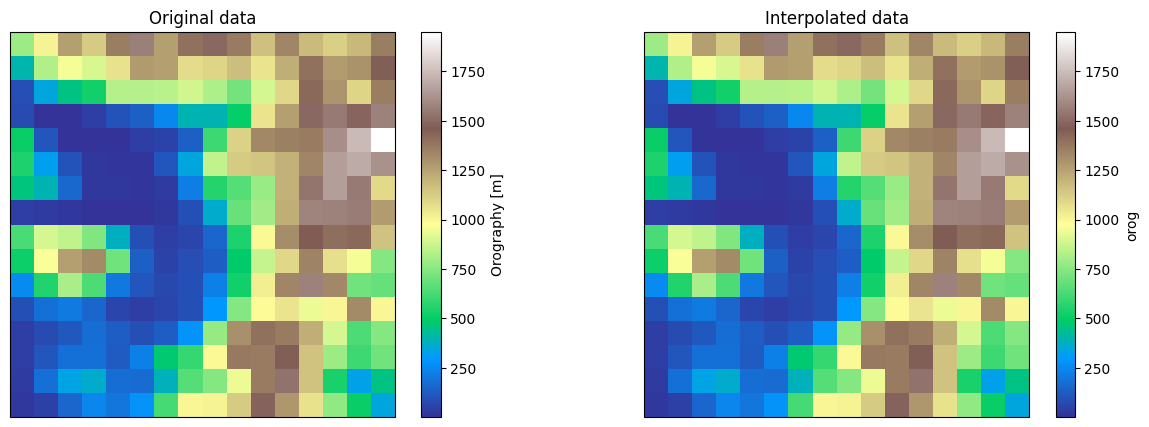

NameError: name 'fine_ds' is not defined

In [3]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def interpolate_and_plot(input_ds):
    def nearest_neighbor_interp(A, new_size):
        Row, Col = new_size
        rtR, rtC = Row / A.shape[0], Col / A.shape[1]
        IR = np.ceil(np.arange(1, A.shape[0] * rtR + 1) / rtR).astype(int) - 1
        IC = np.ceil(np.arange(1, A.shape[1] * rtC + 1) / rtC).astype(int) - 1
        IR[IR >= A.shape[0]] = A.shape[0] - 1
        IC[IC >= A.shape[1]] = A.shape[1] - 1
        return A[IR, :][:, IC]
    data = np.array(input_ds['orog'])
    fine_data = nearest_neighbor_interp(data, (data.shape[0] * 4, data.shape[1] * 4))
    latitudes = np.linspace(input_ds.latitude.values.max(), input_ds.latitude.values.min(), fine_data.shape[0])
    longitudes = np.linspace(input_ds.longitude.values.min(), input_ds.longitude.values.max(), fine_data.shape[1])
    fine_data_array = xr.DataArray(
        fine_data,
        coords=[latitudes, longitudes],
        dims=['latitude', 'longitude'],
        name='orog'
    )
    fine_ds = xr.Dataset({'orog': fine_data_array})
    return fine_ds

# Usage example:
reference_ds = xr.open_dataset('load_data/reference_ds.grib2', engine='cfgrib')
reference_ds = reference_ds.sel(latitude=slice(50, 46.25), longitude=slice(236, 239.75))
interpolated_ds = interpolate_and_plot(reference_ds)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
reference_ds['orog'].plot(ax=axs[0], cmap='terrain')
axs[0].set_title('Original data')
interpolated_ds['orog'].plot(ax=axs[1], cmap='terrain')
axs[1].set_title('Interpolated data')
plt.show()

print(f"Mean values - Original: {reference_ds['orog'].mean().values}, Interpolated: {fine_ds['orog'].mean().values}")
print(f"Shapes - Original: {interpolated_ds['orog'].shape}, Interpolated: {fine_ds['orog'].shape}")

Ignoring index file 'load_data/reference_ds.grib2.9093e.idx' incompatible with GRIB file
/var/folders/2w/tdd086396rbc9tczxtft0tqc0000gn/T/ipykernel_20379/2886812244.py:20: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  reference_ds = reference_ds.drop('time')


<xarray.DataArray 'orog' ()> Size: 4B
array(380.32047, dtype=float32)
Coordinates:
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ... <xarray.DataArray 'orog' ()> Size: 4B
array(379.647, dtype=float32)
Coordinates:
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  datetime64[ns] 8B 2024-04-30T12:00:00


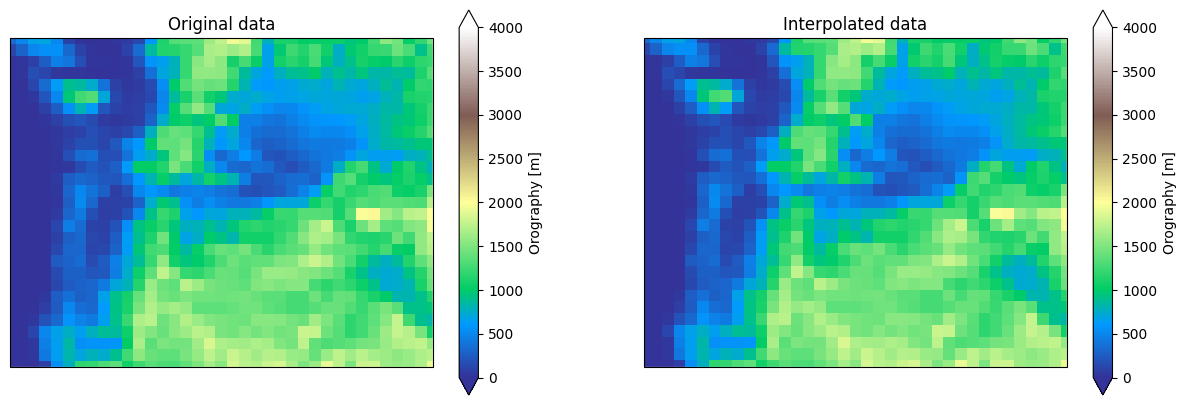

<xarray.DataArray 'orog' ()> Size: 4B
array(380.32047, dtype=float32)
Coordinates:
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ... <xarray.DataArray 'orog' ()> Size: 4B
array(379.64734, dtype=float32)
Coordinates:
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  datetime64[ns] 8B 2024-04-30T12:00:00


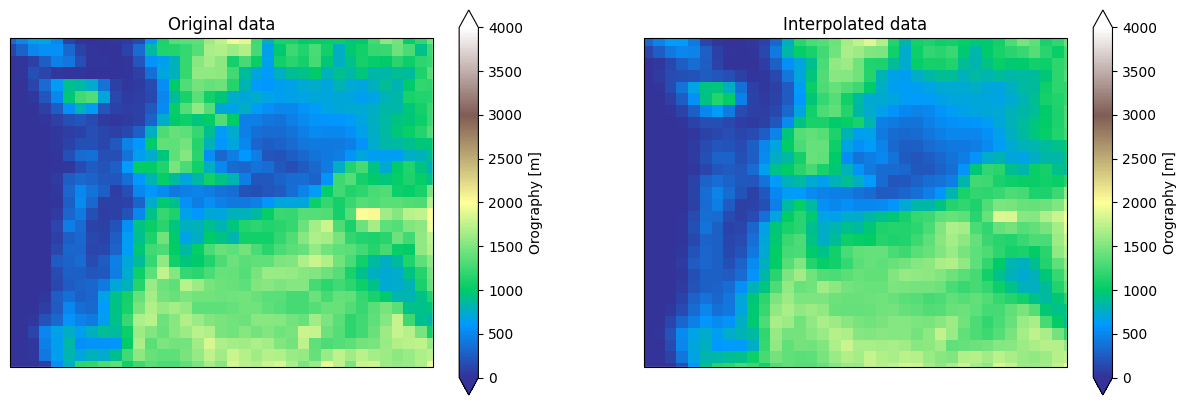

In [24]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import constants
import xarray as xr
import pandas as pd
year, month = 2019, 1
ds = xr.open_dataset(f'{constants.nc_dir}{year}-{month:02d}.nc')
time_index = pd.DatetimeIndex(ds.time.values)
filtered_times = time_index[time_index.hour.isin([3, 6, 9, 12, 15, 18, 21, 0])]
ds = ds.sel(time=filtered_times)
ds = ds.sortby('time')



reference_ds = xr.open_dataset('load_data/reference_ds.grib2', engine='cfgrib')
reference_ds = reference_ds.drop('time')
reference_ds = reference_ds.assign_coords(longitude=(((reference_ds.longitude + 180) % 360) - 180)).sortby('longitude')

#interpolate reference_ds 4x
new_lat = np.linspace(reference_ds.latitude.values.max(), reference_ds.latitude.values.min(), reference_ds['orog'].shape[0] * 4)
new_lon = np.linspace(reference_ds.longitude.values.min(), reference_ds.longitude.values.max(), reference_ds['orog'].shape[1] * 4)
interpolated_ds = reference_ds.interp(latitude=new_lat, longitude=new_lon, method='nearest')

print(np.mean(reference_ds['orog']), np.mean(interpolated_ds['orog']))

#plot them side by side using cartopy in the pacific northwest
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
reference_ds['orog'].plot(ax=axs[0], cmap='terrain', vmin=0, vmax=4000)
axs[0].set_title('Original data')
interpolated_ds['orog'].plot(ax=axs[1], cmap='terrain', vmin=0, vmax=4000)
axs[1].set_title('Interpolated data')
#set the extent to the pacific northwest
axs[0].set_extent([-125, -116, 42, 49])
axs[1].set_extent([-125, -116, 42, 49])
plt.show()

interpolated_ds = interpolated_ds.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

print(np.mean(reference_ds['orog']), np.mean(interpolated_ds['orog']))

#plot them side by side using cartopy in the pacific northwest
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
reference_ds['orog'].plot(ax=axs[0], cmap='terrain', vmin=0, vmax=4000)
axs[0].set_title('Original data')
interpolated_ds['orog'].plot(ax=axs[1], cmap='terrain', vmin=0, vmax=4000)
axs[1].set_title('Interpolated data')
#set the extent to the pacific northwest
axs[0].set_extent([-125, -116, 42, 49])
axs[1].set_extent([-125, -116, 42, 49])
plt.show()